# Titanic Project

### Version History:

Version 1: Ran Chris's Model, got a 75%

Version 2: Changed Age bins to parse by decade, changed fare to split into above and below average, dropped Cabin, but added Embarked back in, changed test data to 35%, got a 73%

Version 3: Changed Age bins to decrease the number of them, changed test data to 50%, got a 74%

Version 4: Ran a logistic regression, got a 77%

Version 5: Ran a random forest, got a 75%

Version 6: Combined SibSp and Parch into one variable to determine whether or not a passenger was alone, reran the decision tree, got a 77%

Version 7:Ran a Logistic Regression on the new data, got a 76%

Version 8: Ran a random forest on the new data, got a 75% again

Version 9: Ran a 5-nearest neighbors classifier, got a 75%

Version 10: Ran a decision tree with entropy as the splitting criterion, got a 77.5%

Version 11: Ran a decision tree with random as the splitter and entropy as the criterion, got a 76%

Version 12: Added a column that takes a person's title, ran the decision tree with entropy as the criterion, got a 77%

Version 13: Reduced the values in the title column so that there are only 7, ran the same model as the previous version, got a 77% again

Version 14: Ran a logistic regression on the new data, got a 76.5%

Version 15: Ran a 5-fold cross validated logistic regression on the new data, got a 74%

*Version 16: Went back to data before the title variable, this time replaced Age missing values using the mean and the mode for Embarked, ran decision tree with entropy as splitting criterion, got a 78%

Version 17: Added title variable back in, ran the same decision tree, got the same exact score (78%)

*=best model

1. What is the purpose of the project?
    
    The purpose of this project is to create a model that best predicts whether a not a passenger will survive based on given variables.

In [1]:
import numpy as np
import pandas as pd
import statistics as st

2. Why to have a test and train dataset

We have test and train data sets so we have some data that has not been seen by our model to test it's performance. The train data set is used to create the model through machine learning, and the data from the test set is then run through the model, and the predicted results are compared to the real values to quantify model performance. In this set, the train data has 891 observations, while the test dataset has 418 observations.

In [2]:
data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')
data_train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.500,NaN,S
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.050,NaN,S
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,NaN,S


Creating a bar chart of the location embarked and survival rate, including error bars

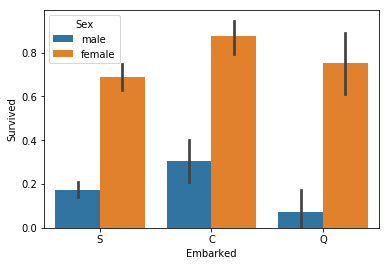

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x="Embarked",y="Survived",hue="Sex",data=data_train)

3. Explain the bar chart

This bar chart is showing the proportion of males and females that boarded the Titanic at each port who survived, with added error bars. It shows that females who embarked at Cherbourg have the highest proportion of survivors.

Creating a line chart showing survival rate by Pclass, split by gender

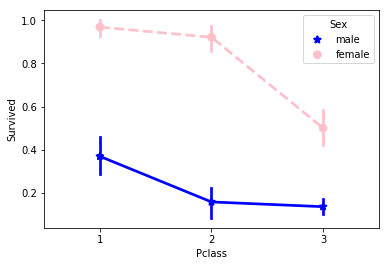

In [5]:
sns.pointplot(x="Pclass",y="Survived",hue="Sex",data=data_train,palette={"male":"blue","female":"pink"},markers=["*","o"],linestyles=["-", "--"])

4. Explain the line chart.

This line chart is showing the proportion of males and females that survived the Titanic,  by their passenger class. It shows that females in Class 1 and 2 have the highest proportion of survivors.

In [7]:
import plotly
plotly.tools.set_credentials_file(username='sdowney1', api_key='PC2qXy2yuYoEwvACH4Fr')

In [3]:
import plotly.plotly as py
import plotly.graph_objs as go

trace = go.Scatter(
    x = data_train["Age"],
    y = data_train["Fare"],
    mode = 'markers'
)
data=[trace]
layout= go.Layout(
    title= 'Age vs Fare',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Age',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Fare',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig= go.Figure(data=data, layout=layout)
py.iplot(fig)

5. What is overfitting? Why do we care?

Overfitting is when you train the model on too much of the data so that it appears to be a perfect model. However, when a model is overfit, it usually does not perform well on testing data because it was trained too precisely.

Function to split ages into 6 categories

In [110]:
def simplify_ages(df):
    df.Age=df.Age.astype('float64')
    mean_age=round(np.nanmean(df.Age),2)
    #df.Age=df.Age.fillna(-0.5)
    #bins=(-1,0,16,32,48,64,120)
    #group_names=["Unknown","Child/Teen","Young Adult","Adult","Middle Aged","Senior"]
    df.Age=df.Age.fillna(mean_age)
    bins=(0,16,32,48,64,120)
    group_names=["Child/Teen","Young Adult","Adult","Middle Aged","Senior"]
    categories=pd.cut(df.Age,bins,labels=group_names)
    df.Age=categories
    return df

Function to split the fares into above average and below average

In [111]:
def simplify_fares(df):
    df.Fare=df.Fare.fillna(-0.5)
    mean_Fare=st.mean(df.Fare)
    bins=(-1,0,mean_Fare,max(df.Fare)+1)
    group_names=["Unknown","Below Average","Above Average"]
    categories=pd.cut(df.Fare,bins,labels=group_names)
    df.Fare=categories
    return df

Function to fill the missing values in the Embarked column

In [112]:
def simplify_embarked(df):
    #df.Embarked=df.Embarked.fillna('N')
    mode=st.mode(df.Embarked)
    df.Embarked=df.Embarked.fillna(mode)
    return df

Function that combines the SibSp and Parch columns to create one variable to say if the passenger was traveling alone or with family

In [113]:
def simplify_family(df):
    df.SibSp=df.SibSp.fillna(-0.5)
    df.Parch=df.Parch.fillna(-0.5)
    df['FamSize']=df['SibSp']+df['Parch']
    bins=(-2,-0.25,0.5,20)
    group_names=["Unknown","Alone","Family"]
    categories=pd.cut(df.FamSize,bins,labels=group_names)
    df.FamSize=categories
    return(df)

Function that pulls a passenger's title from their name

In [114]:
def simplify_names(df):
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Mrs','Mme'], 'Married Female')
    df['Title'] = df['Title'].replace(['Miss','Ms','Mlle'], 'Single Female')
    df['Title'] = df['Title'].replace(['Master','Capt','Sir','Don','Major', 'Col','Jonkheer'], 'Upper Male')
    df['Title'] = df['Title'].replace(['Lady','Countess'], 'Upper Female')
    return df

Function to drop unnessecary variables

In [115]:
def drop_features(df):
    return df.drop(['Ticket','Name','Cabin','SibSp','Parch'],axis=1)

Function to run all of the previously defined functions at once

In [116]:
def transform_features(df):
    df=simplify_ages(df)
    df=simplify_fares(df)
    df=simplify_embarked(df)
    df=simplify_family(df)
    df=simplify_names(df)
    df=drop_features(df)
    return df

6. Explain the transformations.

The transformations are used to avoid overfitting the model. Ages are grouped into logical categories so that the model will look at these instead of the individual numeric ages. Like Age, fare was simplified down into categories so that the model will not train on individual fares (there is a wide range of fares, which may cause errors) The embarked function simply replaces missing values with the most frequent location. The family function combines 2 of the variables to decrease the number of dimensions used by the models, and the names transformation pulls out a person's title, as it is most likely an indicator of their class. 

Running all the functions on both the training and testing data

In [117]:
data_train=transform_features(data_train)
data_test=transform_features(data_test)
data_train[:6]

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamSize,Title
0,1,0,3,male,Young Adult,Below Average,S,Family,Mr
1,2,1,1,female,Adult,Above Average,C,Family,Married Female
2,3,1,3,female,Young Adult,Below Average,S,Alone,Single Female
3,4,1,1,female,Adult,Above Average,S,Family,Married Female
4,5,0,3,male,Adult,Below Average,S,Alone,Mr
5,6,0,3,male,Young Adult,Below Average,Q,Alone,Mr


Encoding all the variables so that they are numbers instead of strings for model building

In [121]:
from sklearn import preprocessing 
def encode_features(df_train, df_test): 
    features = ['Fare', 'Age', 'Sex','Embarked','FamSize','Title'] 
    df_combined = pd.concat([df_train[features], df_test[features]]) 
    for feature in features: 
        le = preprocessing.LabelEncoder() 
        le = le.fit(df_combined[feature]) 
        df_train[feature] = le.transform(df_train[feature]) 
        df_test[feature] = le.transform(df_test[feature]) 
    return df_train, df_test 

data_train, data_test = encode_features(data_train, data_test) 
data_train[:6]

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamSize,Title
0,1,0,3,1,4,1,2,1,3
1,2,1,1,0,0,0,0,1,2
2,3,1,3,0,4,1,2,0,5
3,4,1,1,0,0,0,2,1,2
4,5,0,3,1,0,1,2,0,3
5,6,0,3,1,4,1,1,0,3


Splitting the data into training and validation sets

In [122]:
from sklearn.model_selection import train_test_split 

X_all = data_train.drop(['Survived', 'PassengerId'], axis=1) 
y_all = data_train['Survived'] 

num_test = 0.50 

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
    test_size=num_test, random_state=23)

Code to run a decision tree

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Choose the type of classifier. 
clf = DecisionTreeClassifier(criterion="entropy")

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Code to run a logistic regrssion

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Choose the type of classifier. 
clf = LogisticRegression()

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

Code to run a logistic regression with k-fold cross validation

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

# Choose the type of classifier. 
clf = LogisticRegressionCV(cv=5)

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

Code to run a random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

Code to run a k-neighbors classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Choose the type of classifier. 
clf = KNeighborsClassifier(n_neighbors=5)

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

Making predictions on the validation set and scoring the results

In [124]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8004484304932735


Making predictions on the test data set and exporting the results so they can be uploded to Kaggle

In [126]:
ids = data_test['PassengerId'] 
predictions = clf.predict(data_test.drop('PassengerId', axis=1))
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions }) 
output.to_csv('titanic-predictions.csv', index = False) 
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
